# Лабораторна робота 1

## Завдання



<ol>
  <li>Налаштувати робоче оточення</li>
  <li>NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.</li>
  <li>Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))</li>
  <li>Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)</li>
  <li>Sklearn (провести вирішення задачі регресії та класифікації)</li>
  <li>Tensorflow (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними, reshape, інтеграцію з np.array, pd.DataFrame)</li>
  <li>Відповіді оформити .ipynb документами за кожним з попередніх пунктів</li>
  <li>Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де мають бути .ipynb файл та необхідні файли з даними</li>
</ol>

#### 2. NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.


In [28]:
import numpy as np

In [29]:
# Create
a = np.random.rand(3, 4)
a

array([[0.62417739, 0.65425728, 0.34550824, 0.1849196 ],
       [0.52917235, 0.52423376, 0.0444349 , 0.75363373],
       [0.24624215, 0.47972268, 0.46174807, 0.14936869]])

In [30]:
# Read
b = a.copy()
b

array([[0.62417739, 0.65425728, 0.34550824, 0.1849196 ],
       [0.52917235, 0.52423376, 0.0444349 , 0.75363373],
       [0.24624215, 0.47972268, 0.46174807, 0.14936869]])

In [31]:
new_row = np.arange(b.shape[1])
new_row

array([0, 1, 2, 3])

In [32]:
# Update
b[0, :] = new_row
b

array([[0.        , 1.        , 2.        , 3.        ],
       [0.52917235, 0.52423376, 0.0444349 , 0.75363373],
       [0.24624215, 0.47972268, 0.46174807, 0.14936869]])

In [33]:
col_to_del = np.random.choice(b.shape[1])
col_to_del

0

In [34]:
# Delete
b = np.delete(b, col_to_del, axis=1)
b

array([[1.        , 2.        , 3.        ],
       [0.52423376, 0.0444349 , 0.75363373],
       [0.47972268, 0.46174807, 0.14936869]])

#### 3. Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))

In [35]:
import pandas as pd

In [36]:
# Create from numpy ndarray
rand_df = pd.DataFrame(b)
rand_df

,0,1,2
0,1.000000,2.000000,3.000000
1,0.524234,0.044435,0.753634
2,0.479723,0.461748,0.149369


In [37]:
# Read from .csv file
ramen_df = pd.read_csv('ramen-ratings.csv')
ramen_df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [59]:
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review #     2580 non-null   int64 
 1   Brand        2580 non-null   object
 2   Variety      2580 non-null   object
 3   Style        2578 non-null   object
 4   Country      2580 non-null   object
 5   Stars        2580 non-null   object
 6   TopTenYear   37 non-null     object
 7   TopTenPlace  37 non-null     object
dtypes: int64(1), object(7)
memory usage: 161.4+ KB


In [38]:
ramen_df['Top Ten'].value_counts()

\n          4
2016 #9     1
2016 #8     1
2015 #9     1
2014 #4     1
2013 #10    1
2014 #10    1
2014 #9     1
2013 #6     1
2012 #4     1
2016 #5     1
2014 #7     1
2013 #4     1
2012 #1     1
2015 #1     1
2014 #6     1
2013 #2     1
2012 #6     1
2013 #9     1
2015 #10    1
2012 #2     1
2016 #1     1
2012 #10    1
2015 #4     1
2012 #9     1
2012 #5     1
2013 #3     1
2014 #8     1
2014 #1     1
2012 #3     1
2014 #5     1
2016 #7     1
2013 #1     1
2016 #10    1
2015 #8     1
2012 #7     1
2015 #7     1
2015 #6     1
Name: Top Ten, dtype: int64

In [47]:
# Replace "\n" values in 'Top Ten' column
ramen_df['Top Ten'] = ramen_df['Top Ten'].replace('\n', np.nan)

In [48]:
ramen_df[['TopTenYear', 'TopTenPlace']] = ramen_df['Top Ten'].str.split(' ', 1, expand=True)

In [51]:
# Visualize preprocessed 'Top Ten' column
ramen_df[~ramen_df['Top Ten'].isnull()].head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten,TopTenYear,TopTenPlace
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,2016,#10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1,2016,#1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8,2016,#8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5,2016,#5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,2016,#9


In [52]:
# Remove original 'Top Ten' column and hash symbol from 'TopTenPlace'
ramen_df.drop('Top Ten', axis=1, inplace=True)
ramen_df['TopTenPlace'] = ramen_df['TopTenPlace'].str[1:] 

In [56]:
ramen_df[~ramen_df['TopTenPlace'].isnull()].head()

,Review #,Brand,Variety,Style,Country,Stars,TopTenYear,TopTenPlace
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016,10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016,1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016,8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016,5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016,9


In [67]:
ramen_df['Stars'].value_counts()

4          384
5          369
3.75       350
3.5        326
3          173
3.25       170
4.25       143
4.5        132
2.75        85
2           68
2.5         67
4.75        64
1.5         37
1.75        27
0           26
1           26
2.25        21
0.5         14
0.25        11
5.0         10
1.25        10
3.50         9
5.00         7
4.00         6
4.3          4
3.8          3
4.0          3
Unrated      3
4.50         3
2.3          2
2.9          2
1.1          2
3.1          2
4.125        2
3.0          2
2.8          2
0.75         1
2.1          1
3.3          1
1.8          1
3.65         1
3.125        1
3.7          1
3.00         1
2.125        1
3.4          1
3.6          1
0.9          1
0.1          1
3.2          1
2.85         1
Name: Stars, dtype: int64

In [68]:
# Remove Unrated value in 'Stars' column
ramen_df = ramen_df[ramen_df['Stars'] != 'Unrated']
ramen_df['Stars'].value_counts()

4        384
5        369
3.75     350
3.5      326
3        173
3.25     170
4.25     143
4.5      132
2.75      85
2         68
2.5       67
4.75      64
1.5       37
1.75      27
1         26
0         26
2.25      21
0.5       14
0.25      11
5.0       10
1.25      10
3.50       9
5.00       7
4.00       6
4.3        4
3.8        3
4.0        3
4.50       3
2.3        2
1.1        2
3.1        2
4.125      2
3.0        2
2.8        2
2.9        2
0.75       1
2.1        1
3.3        1
1.8        1
3.65       1
3.125      1
3.7        1
3.00       1
2.125      1
3.4        1
3.6        1
0.9        1
0.1        1
3.2        1
2.85       1
Name: Stars, dtype: int64

In [70]:
# Convert object columns to int
cols = ['Stars', 'TopTenYear', 'TopTenPlace']
ramen_df[cols] = ramen_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [71]:
ramen_df.dtypes

Review #         int64
Brand           object
Variety         object
Style           object
Country         object
Stars          float64
TopTenYear     float64
TopTenPlace    float64
dtype: object

In [73]:
# Select last 5 rows starting from the third column
ramen_df.iloc[-5:, 2:]

,Variety,Style,Country,Stars,TopTenYear,TopTenPlace
2575,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN,NaN
2576,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN,NaN
2577,Tom Yum Shrimp,Pack,Thailand,2.0,NaN,NaN
2578,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN,NaN
2579,Miso Ramen,Pack,USA,0.5,NaN,NaN


#### 4. Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

In [77]:
import matplotlib.pyplot as plt

%matplotlib inline

In [135]:
# Generate data for regression promblem
from sklearn.datasets import make_regression

seed = 101
X, y = make_regression(n_samples=20, n_features=1, noise=0, random_state=seed)
y_hat = y * np.random.normal(1, 0.3, y.shape[0])

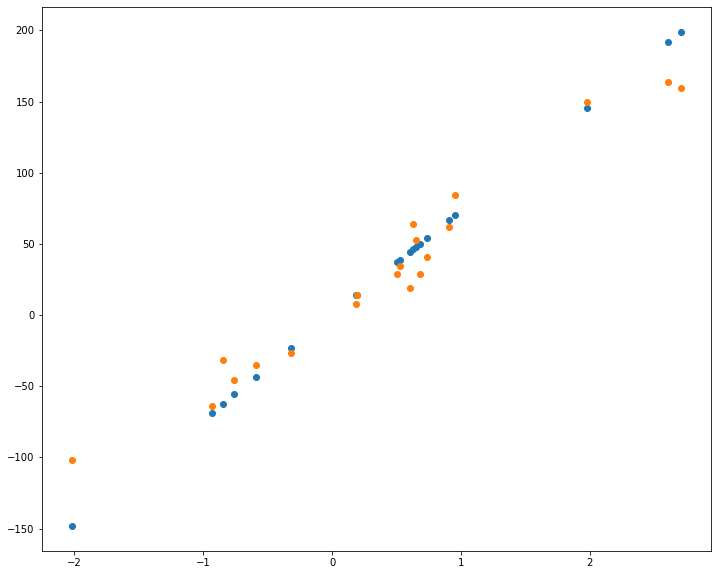

In [136]:
fig = plt.figure(figsize=(12, 10))
    
ax1 = plt.subplot()
ax1.scatter(X, y)
ax1.scatter(X, y_hat)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [139]:
mae_mse_df = pd.DataFrame({'X': np.squeeze(X), 'Y': y, 'Y_hat': y_hat})
mae_mse_df.head()

,X,Y,Y_hat
0,-0.319318,-23.464098,-26.600799
1,1.978757,145.402859,149.454006
2,-0.589001,-43.280882,-35.391339
3,0.190794,14.019930,13.930642
4,-2.018168,-148.298849,-101.513636


In [142]:
mae_mse_df['mAE'] = mean_absolute_error(mae_mse_df['Y'], mae_mse_df['Y_hat'])
mae_mse_df['mSE'] = mean_squared_error(mae_mse_df['Y'], mae_mse_df['Y_hat'])

In [143]:
mae_mse_df.head()

,X,Y,Y_hat,mAE,mSE
0,-0.319318,-23.464098,-26.600799,14.834251,385.169423
1,1.978757,145.402859,149.454006,14.834251,385.169423
2,-0.589001,-43.280882,-35.391339,14.834251,385.169423
3,0.190794,14.019930,13.930642,14.834251,385.169423
4,-2.018168,-148.298849,-101.513636,14.834251,385.169423


In [144]:
mae_mse_df.to_csv('x_y_y_hat_mae_mse.csv', index=False)

#### 5. Sklearn (провести вирішення задачі регресії та класифікації) 

In [145]:
# Generate data for classification promblem
from sklearn.datasets import make_blobs

In [159]:
X_clf, y_clf = make_blobs(n_samples=20, n_features=2, centers=2, random_state=seed)

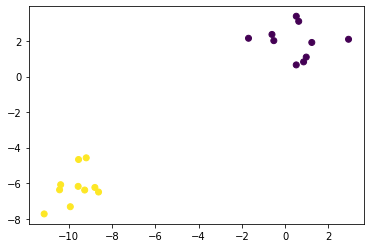

In [160]:
ax2 = plt.subplot()
ax2.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf)

In [162]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [163]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.33, random_state=seed)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.33, random_state=seed)

In [164]:
from sklearn.metrics import classification_report

In [170]:
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print('MAE: ', mean_squared_error(y_test_reg, y_pred_reg))

MAE:  4.507776601262924e-31


In [168]:
clf_model = LogisticRegression()
clf_model.fit(X_train_clf, y_train_clf)
y_pred_clf = clf_model.predict(X_test_clf)

print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



C:\Users\andreshat\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 6. Tensorflow (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними, reshape, інтеграцію з np.array, pd.DataFrame)

In [171]:
import tensorflow as tf

In [172]:
# Create
tf_rand = tf.random.normal(shape=(3, 4), seed=seed)
tf_rand

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-2.3159974 , -0.07912122, -0.8998717 ,  0.31664512],
       [-1.1119006 ,  1.3949379 ,  0.4992896 , -1.461813  ],
       [-0.7174765 , -0.4182692 , -2.1247718 ,  1.7517222 ]],
      dtype=float32)>

In [178]:
# Read
tf_rand_var = tf.Variable(tf_rand)
tf_rand_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[-2.3159974 , -0.07912122, -0.8998717 ,  0.31664512],
       [-1.1119006 ,  1.3949379 ,  0.4992896 , -1.461813  ],
       [-0.7174765 , -0.4182692 , -2.1247718 ,  1.7517222 ]],
      dtype=float32)>

In [179]:
# Update
tf_rand_var[0, 0].assign(1000)
tf_rand_var

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 1.0000000e+03, -7.9121225e-02, -8.9987171e-01,  3.1664512e-01],
       [-1.1119006e+00,  1.3949379e+00,  4.9928960e-01, -1.4618130e+00],
       [-7.1747649e-01, -4.1826919e-01, -2.1247718e+00,  1.7517222e+00]],
      dtype=float32)>

In [184]:
# Delete
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=(2, 3))
a_vecs = tf.unstack(a, axis=1)
del a_vecs[1]
a_new = tf.stack(a_vecs, 1)
a_new

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 3.],
       [4., 6.]], dtype=float32)>

In [180]:
# To numpy
tf_rand_var.numpy()

array([[ 1.0000000e+03, -7.9121225e-02, -8.9987171e-01,  3.1664512e-01],
       [-1.1119006e+00,  1.3949379e+00,  4.9928960e-01, -1.4618130e+00],
       [-7.1747649e-01, -4.1826919e-01, -2.1247718e+00,  1.7517222e+00]],
      dtype=float32)

In [181]:
# Reshape
tf_rand_var_reshaped = tf.reshape(tf_rand_var, (6, 2))
tf_rand_var_reshaped

<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[ 1.0000000e+03, -7.9121225e-02],
       [-8.9987171e-01,  3.1664512e-01],
       [-1.1119006e+00,  1.3949379e+00],
       [ 4.9928960e-01, -1.4618130e+00],
       [-7.1747649e-01, -4.1826919e-01],
       [-2.1247718e+00,  1.7517222e+00]], dtype=float32)>